In [27]:
import xarray as xr
import cdsapi
import netCDF4 as nc
from goes2go import GOES
import requests
from datetime import datetime, timedelta
import os
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np

In [28]:
from data_retriever import retrieve_goes_glmf

In [29]:
era_grid = xr.open_dataset('49532bf0b60c575c14ab777b16ea9b54.nc')

In [30]:
era_grid

<xarray.Dataset> Size: 54kB
Dimensions:     (valid_time: 1, latitude: 81, longitude: 161)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2020-04-19
  * latitude    (latitude) float64 648B 45.0 44.75 44.5 ... 25.5 25.25 25.0
  * longitude   (longitude) float64 1kB -110.0 -109.8 -109.5 ... -70.25 -70.0
    expver      <U4 16B ...
Data variables:
    cape        (valid_time, latitude, longitude) float32 52kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-23T00:36 GRIB to CDM+CF via cfgrib-0.9.1...

In [31]:
boundaries = [(25, 45), (-110, -70)]
date = datetime(2023, 4, 29)
retrieve_goes_glmf(date, 'testing_retriever_goes.nc', boundaries, era_grid)

Processing files for year 2023, day 119, hour 0
Files to process: ['https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429000500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429001000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429001500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429002000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429002500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429003000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429003500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_gl

/gpfs/fs1/home/o/oneill/mamous3/lightning/data_collection/data_retriever.py:115: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


Processing files for year 2023, day 119, hour 1
Files to process: ['https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429010500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429011000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429011500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429012000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429012500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429013000.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_glmgrid_arch/2023/2023119/OR_GLM-L2-GLMF-M3_G16_e20230429013500.nc', 'https://lightningdev.umd.edu/feng_data_sharing/113_g16_gl

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
import xarray as xr

# Open the NetCDF dataset
Flash_extent_density = xr.open_dataset('testing_retriever_goes.nc')

In [33]:
Flash_extent_density

<xarray.Dataset> Size: 3MB
Dimensions:                        (latitude: 81, longitude: 161, time: 24)
Coordinates:
  * latitude                       (latitude) float64 648B 45.0 44.75 ... 25.0
  * longitude                      (longitude) float64 1kB -110.0 ... -70.0
  * time                           (time) datetime64[ns] 192B 2023-04-29 ... ...
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 3MB ...

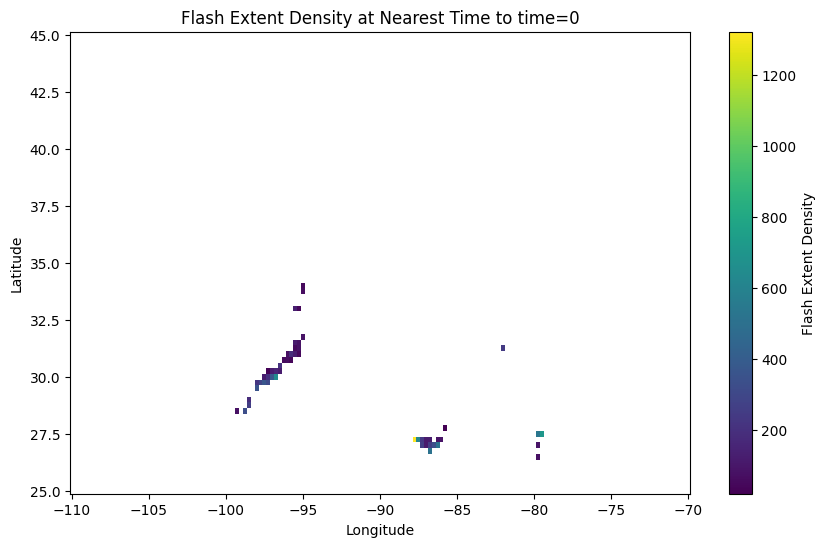

In [34]:
import matplotlib.pyplot as plt

# Select the nearest time slice
FED_slice = Flash_extent_density['__xarray_dataarray_variable__'].isel(time=0)

# Plot the slice using xarray's built-in plotting
FED_slice.plot(
    x='longitude', y='latitude',
    cmap='viridis',
    figsize=(10, 6),
    cbar_kwargs={'label': 'Flash Extent Density'}
)

# Add title and labels
plt.title('Flash Extent Density at Nearest Time to time=0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<xarray.Dataset> Size: 3MB
Dimensions:                        (latitude: 81, longitude: 161, time: 24)
Coordinates:
  * latitude                       (latitude) float64 648B 45.0 44.75 ... 25.0
  * longitude                      (longitude) float64 1kB -110.0 ... -70.0
  * time                           (time) datetime64[ns] 192B 2023-04-29 ... ...
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 3MB ...


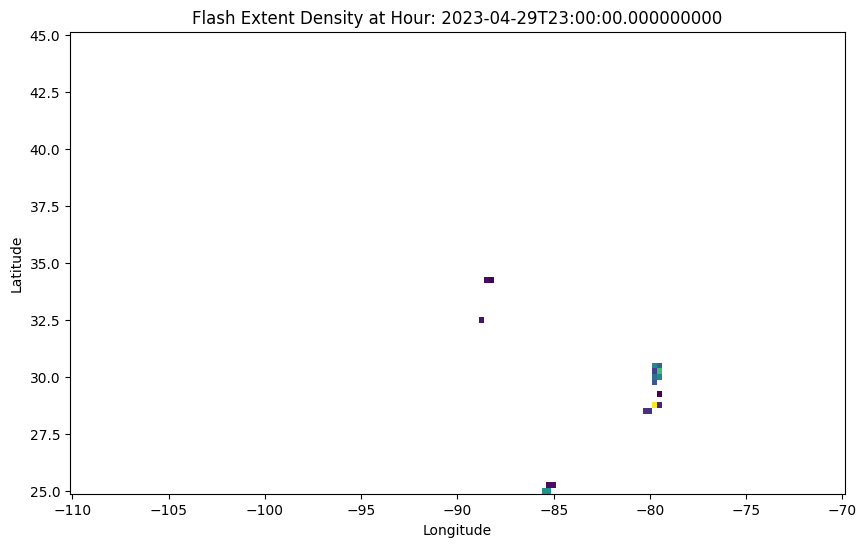

In [35]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation
import numpy as np

# Open the dataset
Flash_extent_density = xr.open_dataset('testing_retriever_goes.nc')

# Inspect the dataset to identify variable and coordinate names
print(Flash_extent_density)

# Function to update the plot for each frame (time step)
def update_plot(frame):
    ax.clear()  # Clear the axis for a new plot
    
    # Select the data for the given time frame
    FED_slice = Flash_extent_density['__xarray_dataarray_variable__'].isel(time=frame)  # Replace with actual variable name
    
    # Plot the data
    im = FED_slice.plot(
        x='longitude', y='latitude',  # Replace with actual coordinate names
        cmap='viridis',
        ax=ax,
        add_colorbar=False
    )
    
    # Add title and labels
    ax.set_title(f'Flash Extent Density at Hour: {str(FED_slice.time.values)}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    return im

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the animation
ani = FuncAnimation(fig, update_plot, frames=len(Flash_extent_density.time), repeat=True)

# Save the animation as a GIF
ani.save('Flash_Extent_Density_Animation.gif', writer='pillow', fps=2)

# Optional: Show the animation (for debugging)
plt.show()


<xarray.Dataset> Size: 3MB
Dimensions:                        (latitude: 81, longitude: 161, time: 24)
Coordinates:
  * latitude                       (latitude) float64 648B 45.0 44.75 ... 25.0
  * longitude                      (longitude) float64 1kB -110.0 ... -70.0
  * time                           (time) datetime64[ns] 192B 2023-04-29 ... ...
Data variables:
    __xarray_dataarray_variable__  (time, latitude, longitude) float64 3MB ...


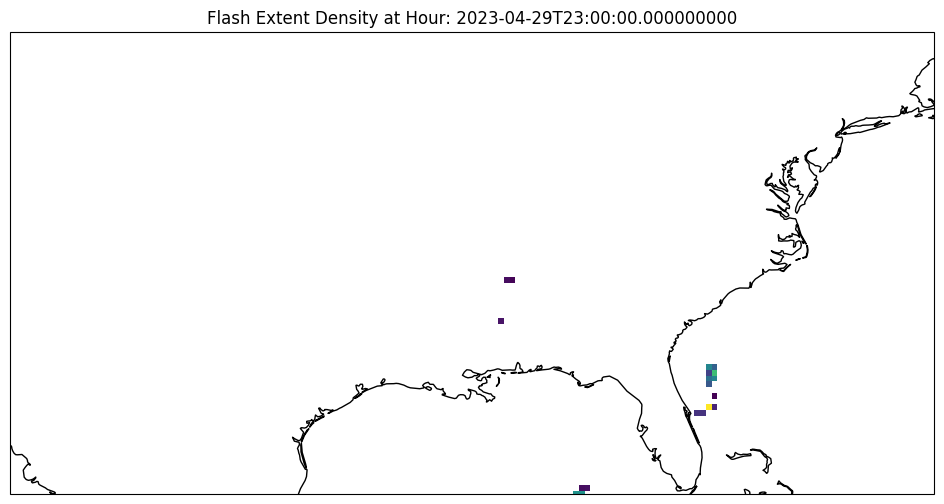

In [36]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the dataset
Flash_extent_density = xr.open_dataset('testing_retriever_goes.nc')

# Inspect the dataset to identify variable and coordinate names
print(Flash_extent_density)

# Function to update the plot for each frame (time step)
def update_plot(frame):
    ax.clear()  # Clear the axis for a new plot
    
    # Select the data for the given time frame
    FED_slice = Flash_extent_density['__xarray_dataarray_variable__'].isel(time=frame)  # Replace with actual variable name
    
    # Plot the data
    im = FED_slice.plot(
        x='longitude', y='latitude',  # Replace with actual coordinate names
        cmap='viridis',
        ax=ax,
        transform=ccrs.PlateCarree(),  # Ensure proper coordinate transformation
        add_colorbar=False
    )
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    
    # Set map extent (adjust based on your region of interest)
    ax.set_extent([-110, -70, 25, 45], crs=ccrs.PlateCarree())
    
    # Add title and labels
    ax.set_title(f'Flash Extent Density at Hour: {str(FED_slice.time.values)}')
    return im

# Create the figure and axis with Cartopy projection
fig, ax = plt.subplots(
    figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()}
)

# Set up the animation
ani = FuncAnimation(
    fig, update_plot, frames=len(Flash_extent_density.time), repeat=True
)

# Save the animation as a GIF
ani.save('Flash_Extent_Density_Animation_Cartopy.gif', writer='pillow', fps=2)

# Optional: Show the animation (for debugging)
plt.show()
